![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [106]:
# seu código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [5]:
# seu código
df = pd.read_csv('https://raw.githubusercontent.com/oliveiraqalan/br-classification-project/master/Churn_Modelling.csv')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [20]:
any_null = []

colunas = list(df.columns)

for col in colunas:
    any_null.append(any(df[col].isnull()))

if any(any_null):
    print('Those columns have Null Values:',
         [c for c, n in zip(df.columns, any_null) if n is True])
else:
    print('There are no Null Values')
          
    

There are no Null Values


4

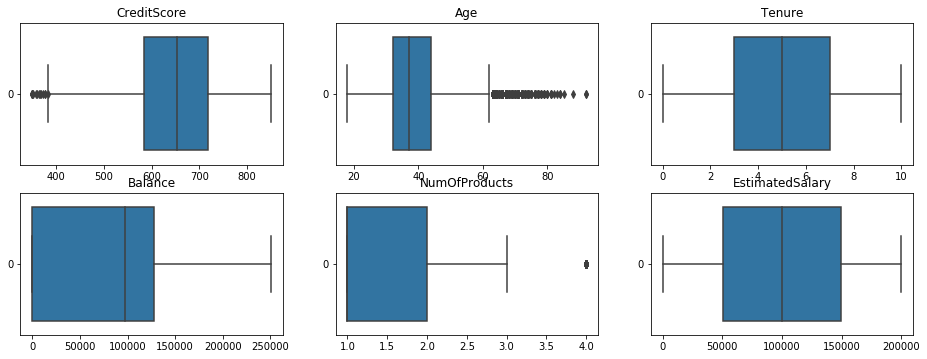

In [56]:
df_numeric = df.drop(labels=['RowNumber','CustomerId','Surname','Geography','Gender'], axis=1)
fig = plt.figure(figsize=[16,12])
axe1 = fig.add_subplot(4,3,1)
axe1.set_title('CreditScore')
sb.boxplot(data = df_numeric['CreditScore'], orient='h')
axe2 = fig.add_subplot(4,3,2)
axe2.set_title('Age')
sb.boxplot(data = df_numeric['Age'], orient = 'h')
axe3 = fig.add_subplot(4,3,3)
axe3.set_title('Tenure')
sb.boxplot(data = df_numeric['Tenure'], orient = 'h')
axe4 = fig.add_subplot(4,3,4)
axe4.set_title('Balance')
sb.boxplot(data = df_numeric['Balance'], orient = 'h')
axe5 = fig.add_subplot(4,3,5)
axe5.set_title('NumOfProducts')
sb.boxplot(data = df_numeric['NumOfProducts'], orient = 'h')
axe6 = fig.add_subplot(4,3,6)
axe6.set_title('EstimatedSalary')
sb.boxplot(data = df_numeric['EstimatedSalary'], orient = 'h')

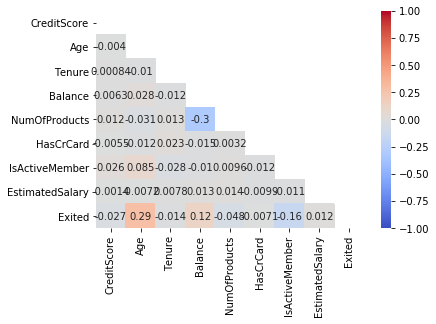

In [64]:
corr = df_numeric.corr()
mask = np.triu(df_numeric.corr())
fig = plt.figure()
sb.heatmap(corr, annot=True, vmin=-1,vmax=1, cmap='coolwarm',mask=mask);

### 3.2 Preparação e limpeza dos dados

In [130]:
# seu código
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_numeric.values))
df_std

#normalização antes ou depois de avaliar o modelo pela primeira vez?

,0,1,2,3,4,5,6,7,8
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


### 3.3 Seleção de atributos

In [131]:
# seu código
X = df_std.drop(8,axis=1)
y = df_numeric['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, test_size =
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [132]:
# seu código
df_std.shape, y_train.shape, y_test.shape, X_train.shape, X_test.shape

((10000, 9), (7500,), (2500,), (7500, 8), (2500, 8))

### 3.4 Construção do modelo

In [133]:
# seu código
LR = LogisticRegression()
LR.fit(X,y) #passa sample_weight?


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1]:
# seu código

### 3.5 Avaliação do modelo

In [146]:
# seu código
#Treino
LR.score(X_train, y_train) #passa sample_weight?


0.8072

In [157]:
# seu código
#Teste
Score_test = LR.score(X_test, y_test)
#y_true =
y_pred = LR.predict(X_test)
Accuracy_test = classification_report(y_test, y_pred)
Accuracy_score = accuracy_score(y_test, y_pred)
AUC = roc_auc_score(y_test, y_pred)

print(f'Score = {Score_test}\n Accurracy = {Accuracy_test}\n AUC= {AUC}')

Score = 0.8072
 Accurracy =               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2003
           1       0.55      0.16      0.24       497

    accuracy                           0.81      2500
   macro avg       0.69      0.56      0.57      2500
weighted avg       0.77      0.81      0.76      2500

 AUC= 0.5627444145652748


### 3.4 Otimização do modelo

In [1]:
# seu código

In [1]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.